<a href="https://colab.research.google.com/github/MonsterHorn/MachineLearning/blob/main/%E5%9B%9E%E5%BD%92%E6%A0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 回归树

In [2]:
# 加载依赖
from sklearn.datasets import load_boston # 导入sklearn自带的数据集
from sklearn.model_selection import cross_val_score # 测试集和训练集的类
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# 读取数据
boston = load_boston()
boston

In [9]:
import pandas as pd
pd.concat([pd.DataFrame(boston.data),pd.DataFrame(boston.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(
    regressor         # 实例化后的模型
    , boston.data       # 完整数据
    , boston.target     # 完整标签
    , cv = 10       # 配置交叉验证次数
    , scoring = "neg_mean_squared_error" # 采用负均方误差（与趋近0越好），默认R^2（越趋近1越好）
)

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

# 实例

In [13]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor # 回归树
import matplotlib.pyplot as plt

# 建立训练集
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80,1),axis=0)
y = np.sin(x).ravel()
y[::5] += 3*(0.5 - rng.rand(16)) 

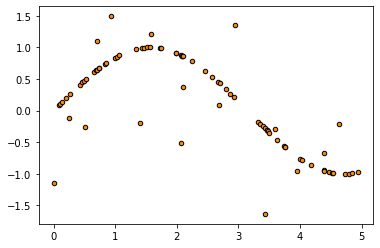

In [17]:
# plt.figure()
plt.scatter(x,y,s=20,edgecolors="black",c="darkorange")

In [18]:
# 进行训练
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x,y)
regr_2.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
# 建立测试集
x_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

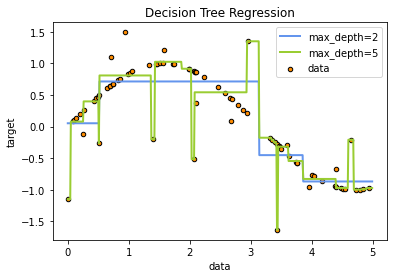

In [23]:
# 画图
plt.scatter(x,y,s=20,edgecolors="black",c="darkorange",label="data")
plt.plot(x_test,y_1,color="cornflowerblue",linewidth=2,label="max_depth=2")
plt.plot(x_test,y_2,color="yellowgreen",linewidth=2,label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 可以看到，深度为5 的时候出现了过拟合，没有 2 好